# Hotel Customer Segmentation - Attrition Classification 

## Objective
### Model experiementation to find the optimal approach to predict a customer with attrition risk using supervised learning classfication models that can out perform the baseline Dummy Classifier from the previous notebook. 

## KPIs

* Reduced DaysSinceLastStay
* Reduced Attrition Rate
* Increased Revenues

## Data

A variety of scaled and modeling ready dataframes with normalized RFM segments or clusters and/or with Persona Clusters.
a real-world customer dataset with 31 variables describes
83,590 instances (customers) from a hotel in Lisbon, Portugal.
Instances include; customer personal, behavioral,
demographic, and geographical information for 3 full years.
The dataset can be found on Kaggle [here].(https://www.kaggle.com/datasets/nantonio/a-hotels-customers-dataset)

Kaggle dataset origin, domain assumptions and data collection information: 

Nuno Antonio, Ana de Almeida, Luis Nunes. A hotel's customer's personal, behavioral, demographic, and geographic dataset from Lisbon, Portugal (2015-2018). Data in Brief 33(2020)106583, 24(November), 2020. URL: https://www.sciencedirect.com/journal/data-in-brief.

## Data Assumptions

Data is aggreated and querried from company SQL database and provided in original flatfile.
* Some hotels have a policy of creating a profile for each guest companion(adult or children) only in particular cases and with authorization at times. 
* Typically a customer profile is created by one of three things:
    - customer's first checked-out at the hotel
    - customer's first cancelation
    - customer's first no-show
* Sometimes there are more than one profile for the same customer
* Only after the customer's first stay can hotels confirm the guest's personal details, such as nationality.
* The target label 'Attrition' is based on a conidtion of DaysSinceLastStay

## Process

1. PyCaret
2. Best model
3. Crossvalidate
4. Degrees of imporatance / feature importance / best features
5. Best hyperperams 
6. Optimization
7. Best preditions
8. Conclusion
9. Solution integration 
10. Future work and considerations

## Questions

1. Will our model perform better than our DummyClassifier and well enough to add into production and data flow?
2. What hyperperameters give the best resulst?
3. What are the most important features in the model?
4. What is the best approach and model? 
5. What are the prediction results?


## Considerations

1. There is no time snapshot of data therefore a churn observation/event window and a churn perfomrance perid window are not viable solutions for with our given data. 
2. Main scaled and modeling ready datasets:
    * Qantile RFM Segments, with or without Persona clusters.
    * KMeans RFM clusters, with or without Persona clusters.

## Import Data

In [4]:
from IPython.utils import io
with io.capture_output() as captured:
    %run 3_Pre-processing.ipynb

## Import New Libraries

In [29]:
%pip install pycaret[full] --user

^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install markupsafe --user

In [1]:
import jinja2
from pycaret.classification import *

In [ ]:
%pip install Jinja2 --user

### Run Best Model with our own preprocessing. 

#### RFM Quantile Segments

In [144]:
model_hotel_customer_rfm.head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,DaysSinceFirstStay,...,CTRY_GBR,CTRY_ITA,CTRY_NLD,CTRY_Other,CTRY_PRT,CTRY_SWE,CTRY_USA,RFM_Seg_Low,RFM_Seg_Middle,RFM_Seg_Top
0,51.0,150,45,371.0,105.3,1,0,3,8,1074,...,0,0,0,0,1,0,0,0,0,1
1,0.0,1095,61,280.0,53.0,0,0,1,10,1100,...,0,0,0,0,1,0,0,0,1,0
2,60.0,1095,93,240.0,60.0,0,0,1,10,1100,...,0,0,0,0,0,0,0,0,1,0
3,54.0,1095,58,230.0,24.0,0,0,1,4,1097,...,0,0,0,1,0,0,0,1,0,0
4,32.0,1095,38,535.0,94.0,0,0,1,10,1100,...,0,0,0,0,0,0,0,0,0,1


In [23]:
model_hotel_customer_rfm['Attrition'] = model_hotel_customer_rfm_norm['Attrition'].astype(int)
model_hotel_customer_rfm_norm.Attrition

0        0
1        1
2        1
3        1
4        1
        ..
63665    0
63666    0
63667    0
63668    0
63669    0
Name: Attrition, Length: 63670, dtype: int32

<AxesSubplot:>

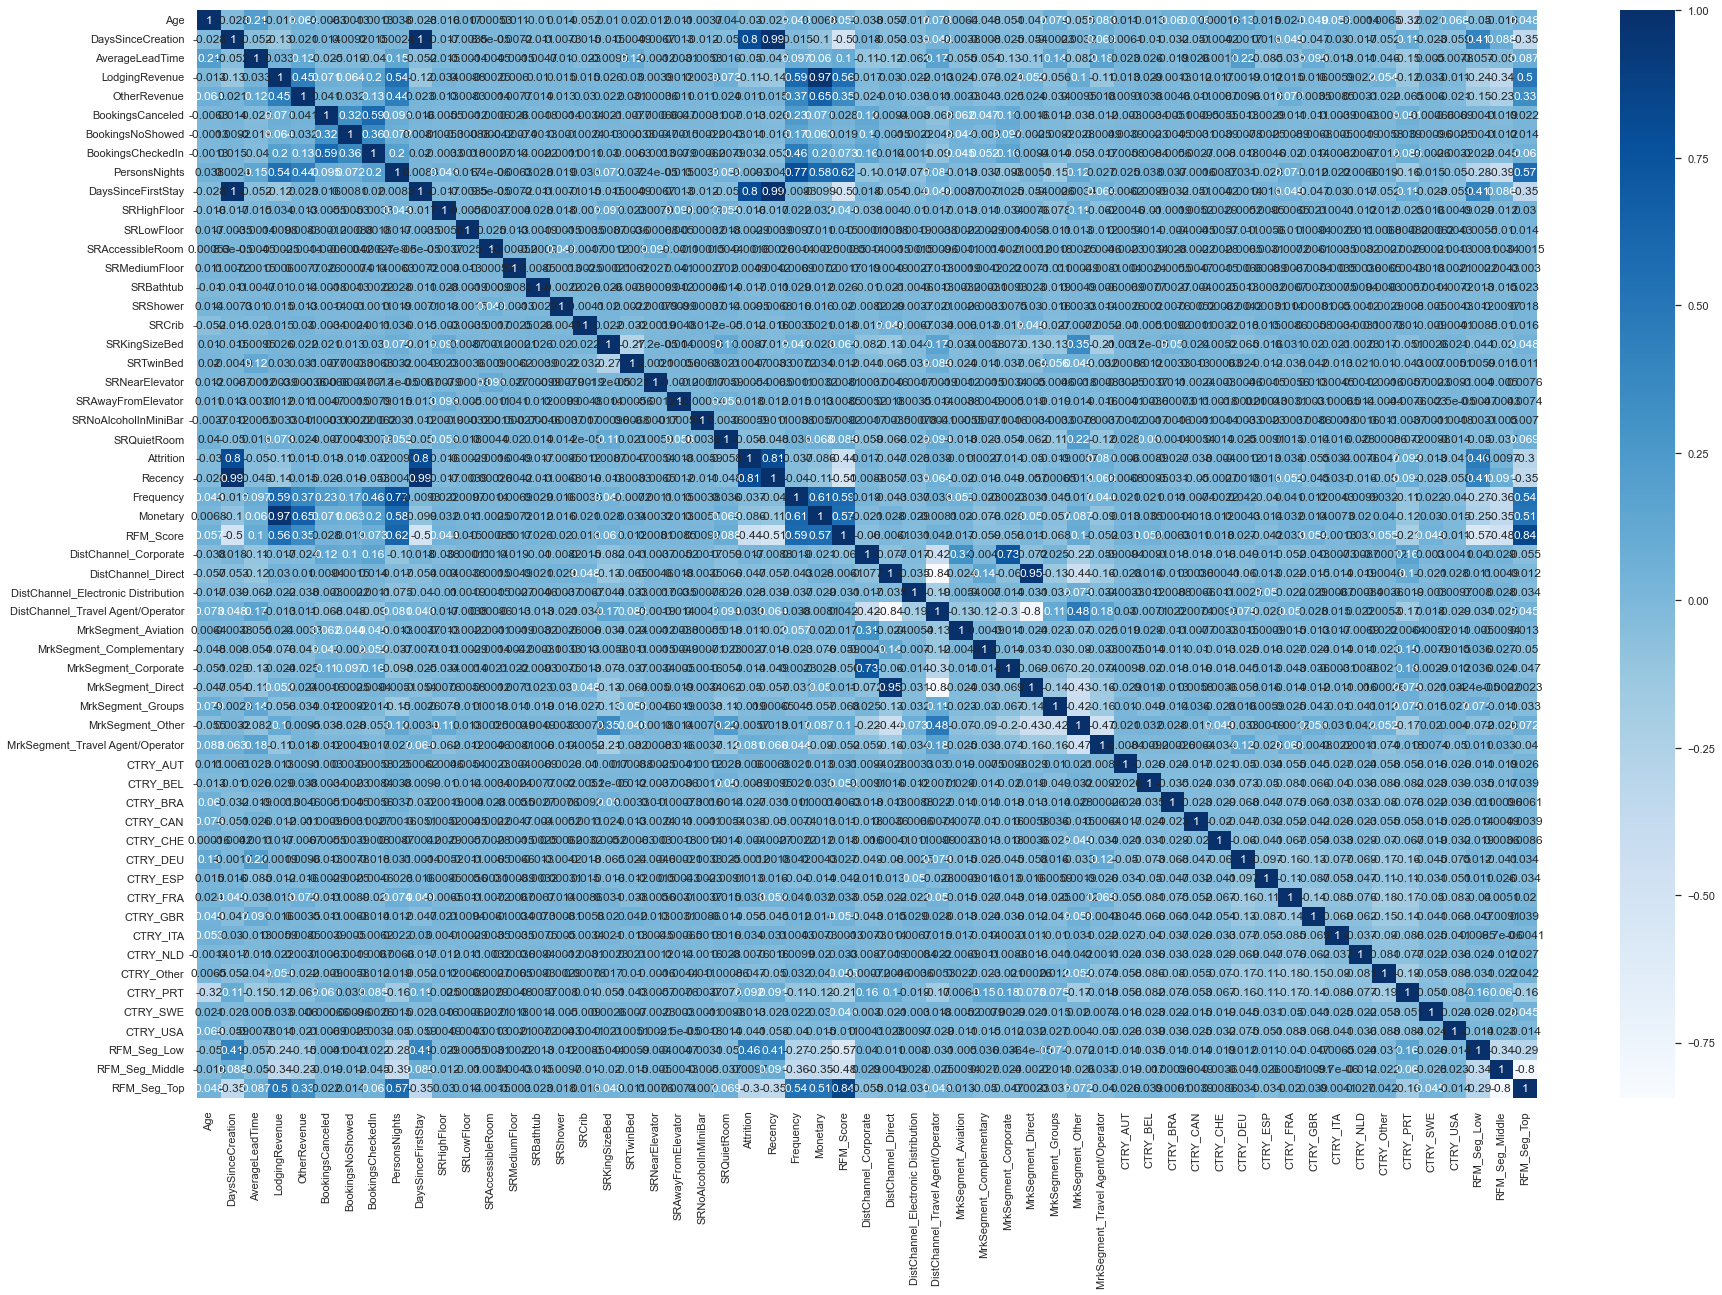

In [155]:
fig, ax = plt.subplots(figsize=(30, 20))

rfm_corr = model_hotel_customer_rfm.corr()
sns.heatmap(rfm_corr, cmap="Blues", annot= True, 
        xticklabels=rfm_corr.columns,
        yticklabels=rfm_corr.columns)

encoded features

'DistChannel_Corporate', 'DistChannel_Direct', 'DistChannel_Electronic Distribution',
                        'DistChannel_Travel Agent/Operator', 'MrkSegment_Aviation', 'MrkSegment_Complementary', 'MrkSegment_Corporate',
                        'MrkSegment_Direct', 'MrkSegment_Groups', 'MrkSegment_Other', 'MrkSegment_Travel Agent/Operator', 'CTRY_AUT','CTRY_BEL',
                        'CTRY_BRA', 'CTRY_CAN', 'CTRY_CHE', 'CTRY_DEU', 'CTRY_ESP', 'CTRY_FRA', 'CTRY_GBR', 'CTRY_ITA', 'CTRY_NLD',
                        'CTRY_Other', 'CTRY_PRT', 'CTRY_SWE', 'CTRY_USA', 'RFM_Seg_Low', 'RFM_Seg_Middle', 'RFM_Seg_Top'

In [168]:
py_SegmentClass = setup(model_hotel_customer_rfm, target = 'Attrition', fix_imbalance = True, ignore_features= ['RFM_Score'], feature_selection= True,
                                                        remove_multicollinearity = True, multicollinearity_threshold = 0.7, 
                                                        normalize = True, remove_outliers = True, session_id=123)

,Description,Value
0,session_id,123
1,Target,Attrition
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(63670, 57)"
5,Missing Values,False
6,Numeric Features,40
7,Categorical Features,15
8,Ordinal Features,False
9,High Cardinality Features,False


In [169]:
best_model = compare_models(sort= 'AUC', cross_validation= False)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8669,0.9379,0.7775,0.7770,0.7773,0.6824,0.6824,12.9000
lightgbm,Light Gradient Boosting Machine,0.8496,0.9320,0.7924,0.7281,0.7589,0.6499,0.6512,8.8300
et,Extra Trees Classifier,0.8589,0.9246,0.7463,0.7733,0.7596,0.6598,0.6600,11.4400
gbc,Gradient Boosting Classifier,0.8253,0.9121,0.7603,0.6876,0.7222,0.5952,0.5968,21.0400
ada,Ada Boost Classifier,0.8232,0.9028,0.7521,0.6860,0.7175,0.5892,0.5905,12.9300
knn,K Neighbors Classifier,0.7981,0.8683,0.7915,0.6286,0.7007,0.5514,0.5597,8.5600
lr,Logistic Regression,0.7838,0.8546,0.7691,0.6094,0.6800,0.5201,0.5281,14.0300
lda,Linear Discriminant Analysis,0.7879,0.8544,0.7686,0.6162,0.6840,0.5273,0.5346,9.3300
dt,Decision Tree Classifier,0.8266,0.8039,0.7475,0.6948,0.7202,0.5948,0.5956,6.9600
ridge,Ridge Classifier,0.7881,0.7825,0.7686,0.6165,0.6842,0.5277,0.5349,8.7400


In [173]:
model = create_model('rf', cross_validation= True, fold= 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8746,0.9459,0.7935,0.8026,0.7980,0.7071,0.7071
1,0.8651,0.9386,0.7663,0.7945,0.7801,0.6829,0.6832
2,0.8736,0.9443,0.7852,0.8053,0.7951,0.7038,0.7039
3,0.8772,0.9459,0.8048,0.8024,0.8036,0.7143,0.7143
4,0.8781,0.9417,0.7980,0.8090,0.8035,0.7152,0.7152
5,0.8625,0.9392,0.7700,0.7855,0.7777,0.6782,0.6783
6,0.8684,0.9419,0.7672,0.8030,0.7847,0.6901,0.6904
7,0.8649,0.9389,0.7884,0.7813,0.7848,0.6864,0.6864
8,0.8581,0.9341,0.7717,0.7735,0.7726,0.6694,0.6694


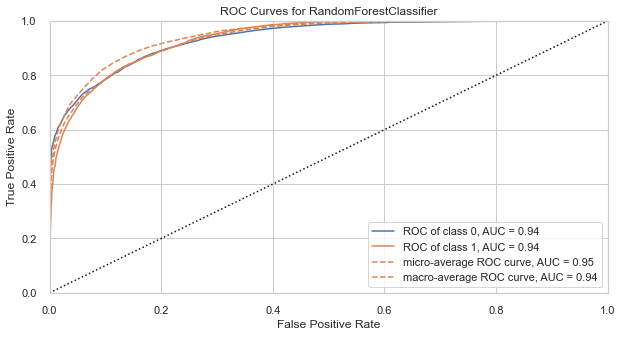

In [174]:
plot_model(model, plot = 'auc')

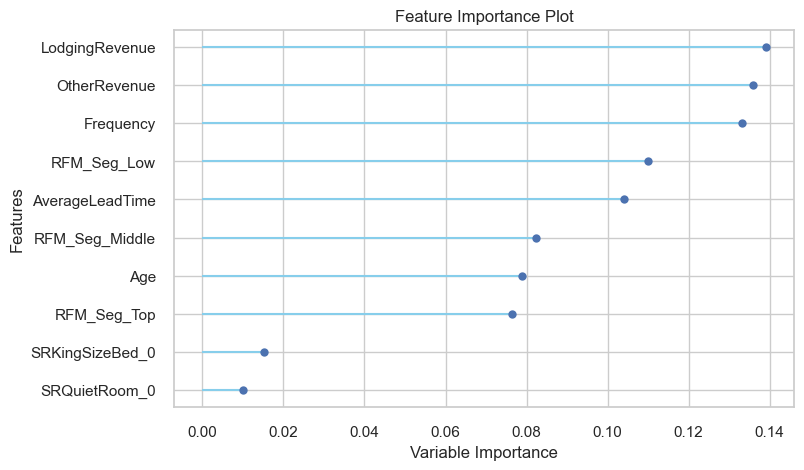

In [175]:
# Feature Importance

plot_model(best_model, plot = 'feature')

Overfitting issues. 

citation: https://towardsdatascience.com/introduction-to-binary-classification-with-pycaret-a37b3e89ad8d#:~:text=PyCaret's%20classification%20module%20(%20pycaret.,on%20various%20techniques%20and%20algorithms.

# PyCaret Setup Parameters
# init setup
from pycaret.classification import *
s1 = setup(data = RFM, target = 'Attrition', data_split= False, ignore_features = ['#', 'Name'], categorical_features = ['AGE'], numeric_features = [''], 
            bin_numeric_features = ['age'], normalize = True, fix_imbalance = True, remove_outliers = True, transformation = True, 
            feature_selection = True, remove_multicollinearity = True, multicollinearity_threshold = 0.6, pca = True, 
            pca_components = 10, ignore_low_variance = True, session_id=123)

#### RFM Quantile Segments Scaled

In [35]:
model_hotel_customer_rfm_norm.head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,DaysSinceFirstStay,...,CTRY_GBR,CTRY_ITA,CTRY_NLD,CTRY_Other,CTRY_PRT,CTRY_SWE,CTRY_USA,RFM_Seg_Low,RFM_Seg_Middle,RFM_Seg_Top
0,0.334595,-1.243485,-0.459671,-0.055740,0.133990,13.109060,-0.024591,3.190277,0.440735,1.795864,...,-0.339121,-0.204716,-0.182901,-0.440174,2.377329,-0.120213,-0.199326,-0.349423,-0.961356,1.197404
1,-2.554614,1.875127,-0.284167,-0.294030,-0.289058,-0.034474,-0.024591,-0.070469,0.905566,1.881673,...,-0.339121,-0.204716,-0.182901,-0.440174,2.377329,-0.120213,-0.199326,-0.349423,1.040198,-0.835140
2,0.844455,1.875127,0.066842,-0.398773,-0.232436,-0.034474,-0.024591,-0.070469,0.905566,1.881673,...,-0.339121,-0.204716,-0.182901,-0.440174,-0.420640,-0.120213,-0.199326,-0.349423,1.040198,-0.835140
3,0.504548,1.875127,-0.317074,-0.424959,-0.523634,-0.034474,-0.024591,-0.070469,-0.488927,1.871772,...,-0.339121,-0.204716,-0.182901,2.271831,-0.420640,-0.120213,-0.199326,2.861860,-0.961356,-0.835140
4,-0.741777,1.875127,-0.536454,0.373707,0.042586,-0.034474,-0.024591,-0.070469,0.905566,1.881673,...,-0.339121,-0.204716,-0.182901,-0.440174,-0.420640,-0.120213,-0.199326,-0.349423,-0.961356,1.197404


In [36]:
py_SegmentClass = setup(model_hotel_customer_rfm, target = 'Attrition', train_size = 0.8,
                        numeric_features= ['Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue',
                        'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn' , 'PersonsNights', 'DaysSinceFirstStay', 'SRHighFloor',
                        'SRLowFloor', 'SRAccessibleRoom' , 'SRMediumFloor' , 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
                        'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom', 'Recency', 'Frequency',
                        'Monetary', 'RFM_Score'])

,Description,Value
0,session_id,2249
1,Target,Attrition
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(63670, 57)"
5,Missing Values,False
6,Numeric Features,56
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [37]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0670
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.8820
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0590
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.6750
lightgbm,Light Gradient Boosting Machine,0.9996,1.0000,0.9994,0.9994,0.9994,0.9991,0.9991,1.2150
et,Extra Trees Classifier,0.9982,1.0000,0.9985,0.9958,0.9971,0.9958,0.9958,1.7320
knn,K Neighbors Classifier,0.9949,0.9997,0.9916,0.9916,0.9916,0.9879,0.9879,0.7330
lr,Logistic Regression,0.9818,0.9981,0.9732,0.9674,0.9703,0.9571,0.9572,10.6840
ridge,Ridge Classifier,0.9787,0.0000,0.9869,0.9458,0.9659,0.9505,0.9509,0.5640
lda,Linear Discriminant Analysis,0.9781,0.9948,0.9893,0.9419,0.9650,0.9491,0.9497,0.4360


#### RFM KMEans Clusters non-scaled

In [6]:
model_hotel_customer_rfm_cluster.head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,DaysSinceFirstStay,...,CTRY_GBR,CTRY_ITA,CTRY_NLD,CTRY_Other,CTRY_PRT,CTRY_SWE,CTRY_USA,RFM_Clus_Low,RFM_Clus_Mid,RFM_Clus_Top
0,51.0,150,45,371.0,105.3,1,0,3,8,1074,...,0,0,0,0,1,0,0,0,1,0
1,0.0,1095,61,280.0,53.0,0,0,1,10,1100,...,0,0,0,0,1,0,0,0,1,0
2,60.0,1095,93,240.0,60.0,0,0,1,10,1100,...,0,0,0,0,0,0,0,0,1,0
3,54.0,1095,58,230.0,24.0,0,0,1,4,1097,...,0,0,0,1,0,0,0,0,1,0
4,32.0,1095,38,535.0,94.0,0,0,1,10,1100,...,0,0,0,0,0,0,0,0,1,0


removed: parameters
 


pca = True

feature_selection = True,

transformation = True

pca_components = 10, -- ** not helping

ignore_low_variance = True -- ** not helping high overfitting scores

   

numeric_features= ['Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue',
                        'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn' , 'PersonsNights', 'DaysSinceFirstStay', 'SRHighFloor',
                        'SRLowFloor', 'SRAccessibleRoom' , 'SRMediumFloor' , 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
                        'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom', 'Recency', 'Frequency',
                        'Monetary'], categorical_features= ['DistChannel_Corporate', 'DistChannel_Direct', 'DistChannel_Electronic Distribution',
                        'DistChannel_Travel Agent/Operator', 'MrkSegment_Aviation', 'MrkSegment_Complementary', 'MrkSegment_Corporate',
                        'MrkSegment_Direct', 'MrkSegment_Groups', 'MrkSegment_Other', 'MrkSegment_Travel Agent/Operator', 'CTRY_AUT','CTRY_BEL',
                        'CTRY_BRA', 'CTRY_CAN', 'CTRY_CHE', 'CTRY_DEU', 'CTRY_ESP', 'CTRY_FRA', 'CTRY_GBR', 'CTRY_ITA', 'CTRY_NLD',
                        'CTRY_Other', 'CTRY_PRT', 'CTRY_SWE', 'CTRY_USA', 'RFM_Clus_Low', 'RFM_Clus_Mid', 'RFM_Clus_Top'], bin_numeric_features = ['Age'], normalize = True, fix_imbalance = True, 
                        remove_outliers = True, remove_multicollinearity = True, multicollinearity_threshold = 0.6, pca = True, session_id=123


In [141]:
py_Cluster_Class = setup(model_hotel_customer_rfm_cluster, target = 'Attrition', fix_imbalance = True, 
                                                        remove_multicollinearity = True, multicollinearity_threshold = 0.7, 
                                                        normalize = True, remove_outliers = True, session_id=123)

,Description,Value
0,session_id,123
1,Target,Attrition
2,Target Type,Binary
3,Label Encoded,"False: 0, True: 1"
4,Original Data,"(63670, 56)"
5,Missing Values,False
6,Numeric Features,40
7,Categorical Features,15
8,Ordinal Features,False
9,High Cardinality Features,False


In [142]:
best_model = compare_models(sort='AUC', cross_validation=False)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9384,0.9838,0.9856,0.8371,0.9053,0.8602,0.8664,7.3100
rf,Random Forest Classifier,0.9422,0.9835,0.9860,0.8458,0.9105,0.8682,0.8737,10.0200
et,Extra Trees Classifier,0.9399,0.9799,0.9712,0.8492,0.9061,0.8622,0.8664,9.3500
gbc,Gradient Boosting Classifier,0.9277,0.9766,0.9972,0.8065,0.8917,0.8384,0.8490,17.1700
ada,Ada Boost Classifier,0.9246,0.9729,0.9947,0.8008,0.8873,0.8316,0.8427,9.6100
lr,Logistic Regression,0.9253,0.9694,0.9974,0.8013,0.8886,0.8335,0.8448,11.6200
lda,Linear Discriminant Analysis,0.9228,0.9675,0.9996,0.7947,0.8855,0.8284,0.8408,7.2700
knn,K Neighbors Classifier,0.9290,0.9661,0.9663,0.8256,0.8905,0.8384,0.8441,8.6000
nb,Naive Bayes,0.9219,0.9492,0.9874,0.7986,0.8830,0.8254,0.8359,7.4800
ridge,Ridge Classifier,0.9228,0.9449,0.9996,0.7947,0.8855,0.8284,0.8408,7.6200


In [143]:
model = create_model('lr', cross_validation= True, fold= 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9242,0.9678,0.9936,0.8079,0.8911,0.8339,0.8444
1,0.9276,0.9714,0.9977,0.8131,0.8960,0.8413,0.8517
2,0.9243,0.9695,0.9977,0.8061,0.8917,0.8346,0.8458
3,0.9260,0.9690,0.9958,0.8105,0.8937,0.8378,0.8482
4,0.9285,0.9694,0.9981,0.8148,0.8972,0.8433,0.8535
Mean,0.9261,0.9694,0.9966,0.8105,0.8939,0.8382,0.8487
Std,0.0017,0.0012,0.0017,0.0032,0.0023,0.0037,0.0034


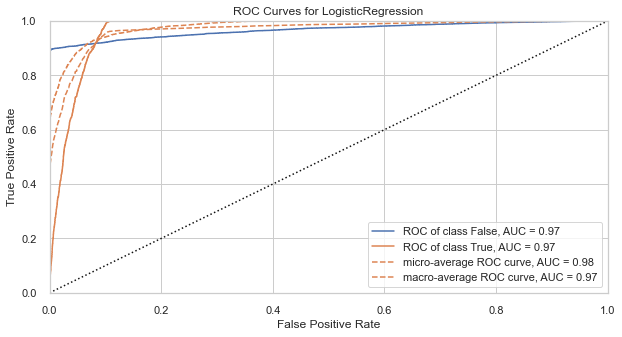

In [105]:
plot_model(model, plot = 'auc')

#### RFM KMeans Clusters scaled

In [7]:
model_hotel_customer_rfm_cluster_norm.head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,DaysSinceFirstStay,...,CTRY_GBR,CTRY_ITA,CTRY_NLD,CTRY_Other,CTRY_PRT,CTRY_SWE,CTRY_USA,RFM_Clus_Low,RFM_Clus_Mid,RFM_Clus_Top
0,0.334595,-1.243485,-0.459671,-0.055740,0.133990,13.109060,-0.024591,3.190277,0.440735,1.795864,...,-0.339121,-0.204716,-0.182901,-0.440174,2.377329,-0.120213,-0.199326,-0.761049,1.271207,-0.578837
1,-2.554614,1.875127,-0.284167,-0.294030,-0.289058,-0.034474,-0.024591,-0.070469,0.905566,1.881673,...,-0.339121,-0.204716,-0.182901,-0.440174,2.377329,-0.120213,-0.199326,-0.761049,1.271207,-0.578837
2,0.844455,1.875127,0.066842,-0.398773,-0.232436,-0.034474,-0.024591,-0.070469,0.905566,1.881673,...,-0.339121,-0.204716,-0.182901,-0.440174,-0.420640,-0.120213,-0.199326,-0.761049,1.271207,-0.578837
3,0.504548,1.875127,-0.317074,-0.424959,-0.523634,-0.034474,-0.024591,-0.070469,-0.488927,1.871772,...,-0.339121,-0.204716,-0.182901,2.271831,-0.420640,-0.120213,-0.199326,-0.761049,1.271207,-0.578837
4,-0.741777,1.875127,-0.536454,0.373707,0.042586,-0.034474,-0.024591,-0.070469,0.905566,1.881673,...,-0.339121,-0.204716,-0.182901,-0.440174,-0.420640,-0.120213,-0.199326,-0.761049,1.271207,-0.578837


####  RFM Quantile Segments + Persona Clusters

In [10]:
model_hotel_customer_rfm_norm_persona.head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,DaysSinceFirstStay,...,CTRY_ITA,CTRY_NLD,CTRY_Other,CTRY_PRT,CTRY_SWE,CTRY_USA,RFM_Seg_Low,RFM_Seg_Middle,RFM_Seg_Top,Persona_Cluster
0,0.334595,-1.243485,-0.459671,-0.055740,0.133990,13.109060,-0.024591,3.190277,0.440735,1.795864,...,-0.204716,-0.182901,-0.440174,2.377329,-0.120213,-0.199326,-0.349423,-0.961356,1.197404,0
1,-2.554614,1.875127,-0.284167,-0.294030,-0.289058,-0.034474,-0.024591,-0.070469,0.905566,1.881673,...,-0.204716,-0.182901,-0.440174,2.377329,-0.120213,-0.199326,-0.349423,1.040198,-0.835140,1
2,0.844455,1.875127,0.066842,-0.398773,-0.232436,-0.034474,-0.024591,-0.070469,0.905566,1.881673,...,-0.204716,-0.182901,-0.440174,-0.420640,-0.120213,-0.199326,-0.349423,1.040198,-0.835140,1
3,0.504548,1.875127,-0.317074,-0.424959,-0.523634,-0.034474,-0.024591,-0.070469,-0.488927,1.871772,...,-0.204716,-0.182901,2.271831,-0.420640,-0.120213,-0.199326,2.861860,-0.961356,-0.835140,1
4,-0.741777,1.875127,-0.536454,0.373707,0.042586,-0.034474,-0.024591,-0.070469,0.905566,1.881673,...,-0.204716,-0.182901,-0.440174,-0.420640,-0.120213,-0.199326,-0.349423,-0.961356,1.197404,3


In [ ]:
py_Segment_Persona = setup(model_hotel_customer_rfm_norm_persona, target = 'Attrition', train_size = 0.8,
                        numeric_features= ['Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue',
                        'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn' , 'PersonsNights', 'DaysSinceFirstStay', 'SRHighFloor',
                        'SRLowFloor', 'SRAccessibleRoom' , 'SRMediumFloor' , 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
                        'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom', 'Recency', 'Frequency',
                        'Monetary', 'RFM_Score', 'Persona_Cluster'], data_split_shuffle= False, bin_numeric_features = ['Age'], normalize = True, fix_imbalance = True, remove_outliers = True, transformation = True, 
            feature_selection = True, remove_multicollinearity = True, multicollinearity_threshold = 0.6, pca = True, 
            pca_components = 10, ignore_low_variance = True, session_id=123)

Feature selection with dataframe using RFE

#### RFM KMeans Clusters + Persona Clusters

In [9]:
model_hotel_customer_rfm_cluster_norm_persona.head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,DaysSinceFirstStay,...,CTRY_ITA,CTRY_NLD,CTRY_Other,CTRY_PRT,CTRY_SWE,CTRY_USA,RFM_Clus_Low,RFM_Clus_Mid,RFM_Clus_Top,Persona_Cluster
0,0.334595,-1.243485,-0.459671,-0.055740,0.133990,13.109060,-0.024591,3.190277,0.440735,1.795864,...,-0.204716,-0.182901,-0.440174,2.377329,-0.120213,-0.199326,-0.761049,1.271207,-0.578837,3
1,-2.554614,1.875127,-0.284167,-0.294030,-0.289058,-0.034474,-0.024591,-0.070469,0.905566,1.881673,...,-0.204716,-0.182901,-0.440174,2.377329,-0.120213,-0.199326,-0.761049,1.271207,-0.578837,2
2,0.844455,1.875127,0.066842,-0.398773,-0.232436,-0.034474,-0.024591,-0.070469,0.905566,1.881673,...,-0.204716,-0.182901,-0.440174,-0.420640,-0.120213,-0.199326,-0.761049,1.271207,-0.578837,2
3,0.504548,1.875127,-0.317074,-0.424959,-0.523634,-0.034474,-0.024591,-0.070469,-0.488927,1.871772,...,-0.204716,-0.182901,2.271831,-0.420640,-0.120213,-0.199326,-0.761049,1.271207,-0.578837,2
4,-0.741777,1.875127,-0.536454,0.373707,0.042586,-0.034474,-0.024591,-0.070469,0.905566,1.881673,...,-0.204716,-0.182901,-0.440174,-0.420640,-0.120213,-0.199326,-0.761049,1.271207,-0.578837,2


Feature selection with dataframe using RFE

Test many classficaiton models using the library PyCaret to give side by side comparrison of classification algorithm performance to find the best model. We can run this on all the modeling dataframes that were prepared in the previous steps to also test various approaches. 

In [ ]:
# init setup
from pycaret.classification import *
s1 = setup(data = data, target = 'default', session_id=123)

Best Modle

Best Model Eval

Plot confusion matrix of best model/ best preditions.

In [ ]:
cm = confusion_matrix(best_model, labels = best_model.classes_ )
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= best_model.classes_)
disp.plot()
plt.show()

Business Value of model